# Plot a histogram of particle radius

Step 1: select an image showing the particles such as
<img src="test_img.jpg" width="300"/>

Step 2: Calibrate image dimensions in ImageJ (Fiji is the newer software)
* For single image (Analyze -> Set Scale). Distance in pixels can be evaluated before with the line tool measurement
* To batch process a folder use the macro "nm Hitachi ImageJ scale calib.ijm" or "um Hitachi ImageJ scale calib.ijm" in this folder to load the 'PixelSize' parameter in the .tex file associated with the .tif image to apply the calibration (Process -> Batch -> Macro, ensure File name contains = .tif).

Step 3: Using ImageJ/Fiji automatically measure each particle area and save results to .csv file http://microscopy.berkeley.edu/courses/dib/sections/04IPIII/particles.html

https://imagej.net/Particle_Analysis
* Set the threshold (Image -> Adjust -> Threshold...) so that the particles are highlighted in red
* [OPTIONAL] Clean the selection of what is a particle using Process -> Noise -> Despeckle
* [OPTIONAL] Select region of interest using the rectangle or oval tool
* [OPTIONAL] If particles are overlapping use a watershed: Process -> Binary -> Fill Holes, Process -> Binary -> Watershed
* Measure the particles (Analyze -> Analyze Particles...), select 'include holes', 'Display results', 'Summarize'
* On the results window right click toolbar and select 'Set Measurements', deselect everything bar Area and press 'OK'
* Save .csv of the results to the same folder as this notebook (File -> Save As)

Step 4: Plot the results into a histogram and, optionally, fit with an expected distribution with the following code:

                            Area       radius
count  4979.000000  4.979000e+03  4979.000000
mean   2490.000000  1.961405e+04    54.335830
std    1437.457825  7.163075e+04    57.372695
min       1.000000  1.181356e+03    19.391681
25%    1245.500000  1.968927e+03    25.034555
50%    2490.000000  4.725424e+03    38.783362
75%    3734.500000  9.844634e+03    55.978963
max    4979.000000  1.818501e+06   760.819814


<IPython.core.display.Javascript object>


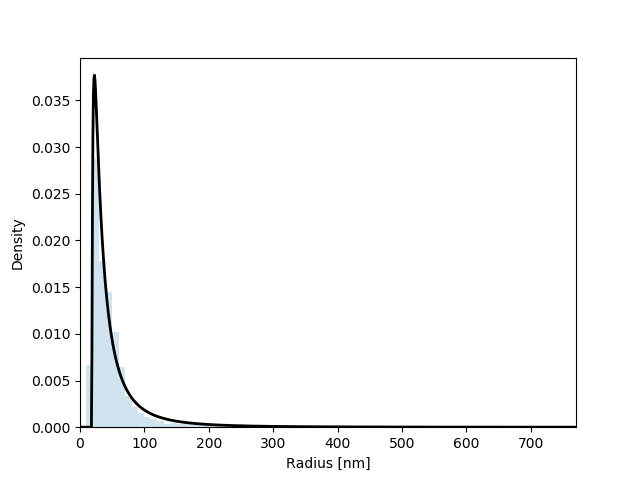

Log-normal fit: Mean 55.2 and Std 66.7


In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib notebook

### USER INPUT ###
fn = 'Results'  # File name of .csv containing each particle area
### ---------- ###

# Begin analysis
df = pd.read_csv(fn+'.csv') # Load data
df['radius'] = np.sqrt(df['Area']/np.pi) # evaluate particle radius assuming circle
print(df.describe())  # Output key stats on the data 

# Plot density histogram
fig, ax = plt.subplots()
dx = 10  # Width of bins to use for histogram
n_bins = np.arange(0, max(df['radius'])+dx, step=dx)  # Specify bins to put data into
res = ax.hist(np.array(df['radius']), density=True, histtype='stepfilled', alpha=0.2, bins=n_bins)

# [OPTIONAL] Fit a distribution to the plot - comment out unwanted distributions to fit
xn = np.linspace(min(n_bins), max(n_bins), num=1000)  # x values to compute theoretical distribution at

# Lognormal distribution
s, loc, scale = stats.lognorm.fit(df['radius'])  # Fit log-normal parameters to data 
pdf_ln = stats.lognorm.pdf(xn, s, loc, scale)  # now get theoretical values in our interval  
plt.plot(xn, pdf_ln, 'k-', lw=2, label="Log-normal")  # plot it
mean, var = stats.lognorm.stats(s, loc, scale, moments='mv')
print('Log-normal fit: Mean {:.1f} and Std {:.1f}'.format(float(mean), float(np.sqrt(var))))

# # Normal distribution
# m, s = stats.norm.fit(df['radius']) # get mean and standard deviation  
# pdf_g = stats.norm.pdf(xn, m, s) # now get theoretical values in our interval  
# plt.plot(xn, pdf_g, label="Normal") # plot it
# mean, var = stats.norm.stats(m, s, moments='mv')
# print('Normal fit: Mean {:.1f} and Std {:.1f}'.format(float(mean), float(np.sqrt(var))))

# Plot axis labels and legend
ax.set_xlabel('Radius [nm]')
ax.set_ylabel('Density')
# ax.legend(loc='best', title='Distribution', frameon=False)
ax.set_xlim([min(n_bins), max(n_bins)])

# [OPTIONAL] Save figure with the same name as the .csv file
plt.savefig(fn + '.png')

Note: for gamma and beta fits see http://danielhnyk.cz/fitting-distribution-histogram-using-python/

<IPython.core.display.Javascript object>


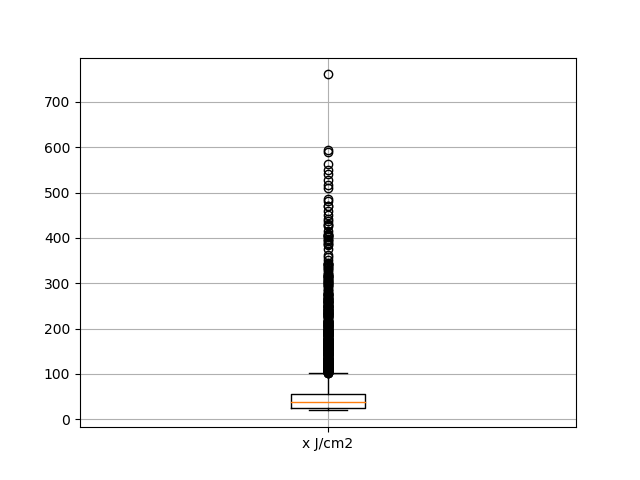

In [5]:
# Boxplot the data as histogram is misleading for outliers
plt.figure()
plt.boxplot(df['radius'], labels=[r'x J/cm2'])
plt.grid()